In [2]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import mean_squared_error, r2_score
import seaborn as sns
import lightgbm as lgb
from sklearn.preprocessing import LabelEncoder

/Users/yangdongjae/opt/anaconda3/lib/python3.7/site-packages/lightgbm/__init__.py:48: UserWarning: Starting from version 2.2.1, the library file in distribution wheels for macOS is built by the Apple Clang (Xcode_8.3.3) compiler.
This means that in case of installing LightGBM from PyPI via the ``pip install lightgbm`` command, you don't need to install the gcc compiler anymore.
Instead of that, you need to install the OpenMP library, which is required for running LightGBM on the system with the Apple Clang compiler.
You can install the OpenMP library by the following command: ``brew install libomp``.
  "You can install the OpenMP library by the following command: ``brew install libomp``.", UserWarning)


In [3]:
label = pd.read_csv('/Users/yangdongjae/Desktop/2020/대외활동/2020년 공공 빅데이터 청년 인턴십/실무형 프로젝트/roundabout_project/data/전국사고csv.csv', encoding = 'cp949')

In [4]:
label

,OBJT_ID,OCCU_YEAR,OCCU_MT,OCCU_DE,OCCU_TM,OCCU_DAY,OCCU_DATE,LCLAS,SCLAS,DEATH,...,DRNKG,KID,ODSN,WLKG,VIOLT_CN,CTPRVN_CD,SGG_CD,EMD_CD,X,Y
0,1,2016,2,27,16,토요일,20160227,경상사고,차대차,0,...,NaN,NaN,NaN,NaN,안전거리 미확보,11,11110,11110101,14134215.68,4521788.508
1,2,2016,2,28,19,일요일,20160228,중상사고,차대차,0,...,NaN,NaN,NaN,NaN,안전운전 의무 불이행,11,11110,11110101,14134196.19,4521218.594
2,3,2016,3,28,7,월요일,20160328,중상사고,차대차,0,...,NaN,NaN,NaN,NaN,안전거리 미확보,11,11110,11110101,14134551.99,4521176.288
3,4,2016,4,5,13,화요일,20160405,경상사고,차대차,0,...,NaN,NaN,O,NaN,안전운전 의무 불이행,11,11110,11110101,14134007.37,4521163.076
4,5,2016,5,15,19,일요일,20160515,경상사고,차대차,0,...,NaN,O,NaN,NaN,안전거리 미확보,11,11110,11110101,14134220.38,4521176.947
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
654354,654355,2018,12,15,16,토요일,20181215,경상사고,차대차,0,...,NaN,NaN,NaN,NaN,신호위반,50,50130,50130320,14118562.64,3939567.424
654355,654356,2018,12,15,23,토요일,20181215,경상사고,차대차,0,...,NaN,NaN,O,NaN,신호위반,50,50130,50130320,14118368.46,3940935.052
654356,654357,2018,12,18,18,화요일,20181218,중상사고,차대차,0,...,NaN,NaN,NaN,NaN,안전운전 의무 불이행,50,50130,50130320,14117683.16,3938694.066
654357,654358,2018,12,21,11,금요일,20181221,중상사고,차대사람,0,...,NaN,NaN,O,O,중앙선 침범,50,50130,50130320,14118871.68,3938561.182


In [5]:
acc = label[['LCLAS']]
enc = OneHotEncoder()
acc = enc.fit_transform(acc)

In [6]:
enc.categories_

[array(['경상사고', '부상신고사고', '사망사고', '중상사고'], dtype=object)]

In [7]:
acc = pd.DataFrame(columns = enc.categories_[0],
                  data = acc.toarray())

In [8]:
label['total'] = label[['DEATH','SWPSN','SINJPSN','INJPSN']].sum(axis = 1)

In [9]:
label = pd.concat([acc,label],axis = 1)

In [10]:
label.drop(['LCLAS'], axis = 1)

,경상사고,부상신고사고,사망사고,중상사고,OBJT_ID,OCCU_YEAR,OCCU_MT,OCCU_DE,OCCU_TM,OCCU_DAY,...,KID,ODSN,WLKG,VIOLT_CN,CTPRVN_CD,SGG_CD,EMD_CD,X,Y,total
0,1.0,0.0,0.0,0.0,1,2016,2,27,16,토요일,...,NaN,NaN,NaN,안전거리 미확보,11,11110,11110101,14134215.68,4521788.508,1
1,0.0,0.0,0.0,1.0,2,2016,2,28,19,일요일,...,NaN,NaN,NaN,안전운전 의무 불이행,11,11110,11110101,14134196.19,4521218.594,11
2,0.0,0.0,0.0,1.0,3,2016,3,28,7,월요일,...,NaN,NaN,NaN,안전거리 미확보,11,11110,11110101,14134551.99,4521176.288,1
3,1.0,0.0,0.0,0.0,4,2016,4,5,13,화요일,...,NaN,O,NaN,안전운전 의무 불이행,11,11110,11110101,14134007.37,4521163.076,1
4,1.0,0.0,0.0,0.0,5,2016,5,15,19,일요일,...,O,NaN,NaN,안전거리 미확보,11,11110,11110101,14134220.38,4521176.947,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
654354,1.0,0.0,0.0,0.0,654355,2018,12,15,16,토요일,...,NaN,NaN,NaN,신호위반,50,50130,50130320,14118562.64,3939567.424,1
654355,1.0,0.0,0.0,0.0,654356,2018,12,15,23,토요일,...,NaN,O,NaN,신호위반,50,50130,50130320,14118368.46,3940935.052,1
654356,0.0,0.0,0.0,1.0,654357,2018,12,18,18,화요일,...,NaN,NaN,NaN,안전운전 의무 불이행,50,50130,50130320,14117683.16,3938694.066,1
654357,0.0,0.0,0.0,1.0,654358,2018,12,21,11,금요일,...,NaN,O,O,중앙선 침범,50,50130,50130320,14118871.68,3938561.182,1


In [11]:
label = label.drop(['X','Y'],axis = 1)

In [12]:
raw_x = label[['OCCU_MT','OCCU_DE','OCCU_DAY','OCCU_TM','OCCU_DATE','OCCU_YEAR','total','EMD_CD','경상사고','부상신고사고','사망사고','중상사고']]
raw_y = label[['total']]

In [13]:
label.rename(columns = {"경상사고":"light", "부상신고사고":"injury", "사망사고": "Dead" , "중상사고":"heavy"})

,light,injury,Dead,heavy,OBJT_ID,OCCU_YEAR,OCCU_MT,OCCU_DE,OCCU_TM,OCCU_DAY,...,INJPSN,DRNKG,KID,ODSN,WLKG,VIOLT_CN,CTPRVN_CD,SGG_CD,EMD_CD,total
0,1.0,0.0,0.0,0.0,1,2016,2,27,16,토요일,...,0,NaN,NaN,NaN,NaN,안전거리 미확보,11,11110,11110101,1
1,0.0,0.0,0.0,1.0,2,2016,2,28,19,일요일,...,0,NaN,NaN,NaN,NaN,안전운전 의무 불이행,11,11110,11110101,11
2,0.0,0.0,0.0,1.0,3,2016,3,28,7,월요일,...,0,NaN,NaN,NaN,NaN,안전거리 미확보,11,11110,11110101,1
3,1.0,0.0,0.0,0.0,4,2016,4,5,13,화요일,...,0,NaN,NaN,O,NaN,안전운전 의무 불이행,11,11110,11110101,1
4,1.0,0.0,0.0,0.0,5,2016,5,15,19,일요일,...,0,NaN,O,NaN,NaN,안전거리 미확보,11,11110,11110101,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
654354,1.0,0.0,0.0,0.0,654355,2018,12,15,16,토요일,...,0,NaN,NaN,NaN,NaN,신호위반,50,50130,50130320,1
654355,1.0,0.0,0.0,0.0,654356,2018,12,15,23,토요일,...,0,NaN,NaN,O,NaN,신호위반,50,50130,50130320,1
654356,0.0,0.0,0.0,1.0,654357,2018,12,18,18,화요일,...,0,NaN,NaN,NaN,NaN,안전운전 의무 불이행,50,50130,50130320,1
654357,0.0,0.0,0.0,1.0,654358,2018,12,21,11,금요일,...,0,NaN,NaN,O,O,중앙선 침범,50,50130,50130320,1


In [14]:
label.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 654359 entries, 0 to 654358
Data columns (total 26 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   경상사고       654359 non-null  float64
 1   부상신고사고     654359 non-null  float64
 2   사망사고       654359 non-null  float64
 3   중상사고       654359 non-null  float64
 4   OBJT_ID    654359 non-null  int64  
 5   OCCU_YEAR  654359 non-null  int64  
 6   OCCU_MT    654359 non-null  int64  
 7   OCCU_DE    654359 non-null  int64  
 8   OCCU_TM    654359 non-null  int64  
 9   OCCU_DAY   654359 non-null  object 
 10  OCCU_DATE  654359 non-null  int64  
 11  LCLAS      654359 non-null  object 
 12  SCLAS      654359 non-null  object 
 13  DEATH      654359 non-null  int64  
 14  SWPSN      654359 non-null  int64  
 15  SINJPSN    654359 non-null  int64  
 16  INJPSN     654359 non-null  int64  
 17  DRNKG      58664 non-null   object 
 18  KID        38664 non-null   object 
 19  ODSN       111933 non-n

In [15]:
#label.to_csv('data_sample.csv')

In [313]:
raw_x['OCCU_DAY'] = raw_x['OCCU_DAY'].astype('category')

/Users/yangdongjae/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [314]:
raw_x['OCCU_DAY']

0         토요일
1         일요일
2         월요일
3         화요일
4         일요일
         ... 
654354    토요일
654355    토요일
654356    화요일
654357    금요일
654358    토요일
Name: OCCU_DAY, Length: 654359, dtype: category
Categories (7, object): [금요일, 목요일, 수요일, 월요일, 일요일, 토요일, 화요일]

In [315]:
train_x.rename(columns = {"경상사고":"light", "부상신고사고":"injury", "사망사고": "Dead" , "중상사고":"heavy"}, inplace = True)

In [316]:
le = LabelEncoder()

train_x['OCCU_DAY'] = le.fit_transform(train_x['OCCU_DAY'])

In [317]:
train_x

,OCCU_MT,OCCU_DE,OCCU_DAY,OCCU_TM,OCCU_DATE,OCCU_YEAR,total,EMD_CD,light,injury,Dead,heavy
232339,5,5,5,22,20180505,2018,1,29170129,1.0,0.0,0.0,0.0
294007,5,21,5,12,20160521,2016,5,41131112,1.0,0.0,0.0,0.0
523296,8,26,4,21,20180826,2018,2,45140114,1.0,0.0,0.0,0.0
305710,11,9,1,21,20171109,2017,1,41150105,0.0,1.0,0.0,0.0
62477,4,4,3,20,20160404,2016,1,11500104,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
644167,8,10,1,14,20170810,2017,4,50110112,0.0,0.0,1.0,0.0
259178,11,23,0,13,20181123,2018,1,30230101,1.0,0.0,0.0,0.0
365838,7,17,6,23,20180717,2018,1,41360256,1.0,0.0,0.0,0.0
131932,10,7,0,16,20161007,2016,1,26290109,1.0,0.0,0.0,0.0


In [318]:
train_x, test_x, train_y, test_y = train_test_split(raw_x, raw_y, test_size=0.2, random_state=42)

In [319]:
train_ds = lgb.Dataset(train_x, label = train_y)
test_ds = lgb.Dataset(test_x, label = test_y)

In [320]:
params = {'learning_rate': 0.001, 
          'max_depth': 16, 
          'boosting': 'gbdt', 
          'objective': 'regression', 
          'metric': 'mse', 
          'is_training_metric': True, 
          'num_leaves': 144, 
          'feature_fraction': 0.9, 
          'bagging_fraction': 0.7, 
          'bagging_freq': 5, 
          'seed':2018}

In [321]:
model = lgb.train(params, train_ds, 1000, test_ds, verbose_eval=100, early_stopping_rounds=100)

LightGBMError: Do not support non-ascii characters in feature name.

In [127]:
predict_train = model.predict(train_x)
predict_test = model.predict(test_x)

In [128]:
model = lgb.train(params , train_ds , 1000 , test_ds , verbose_eval = 100 , early_stopping_rounds = 100)

Training until validation scores don't improve for 100 rounds
[100]	valid_0's l2: 1.10846
[200]	valid_0's l2: 0.924746
[300]	valid_0's l2: 0.770026
[400]	valid_0's l2: 0.644956
[500]	valid_0's l2: 0.540178
[600]	valid_0's l2: 0.447108
[700]	valid_0's l2: 0.376598
[800]	valid_0's l2: 0.314743
[900]	valid_0's l2: 0.263049
[1000]	valid_0's l2: 0.221939
Did not meet early stopping. Best iteration is:
[1000]	valid_0's l2: 0.221939


In [129]:
predict_train = model.predict(train_x)
predict_test = model.predict(test_x)

In [130]:
mse = mean_squared_error(test_y, predict_test)
r2 = r2_score(test_y, predict_test)

In [131]:
print('Mean squared error: ', mse)
print('R2 score: ', r2)

Mean squared error:  0.2219392233099051
R2 score:  0.8316247734008559


In [132]:
final_result = pd.concat([test_y.reset_index(drop=True), pd.DataFrame(predict_test)], axis = 1)

In [133]:
final_result.columns = ['label','predict']

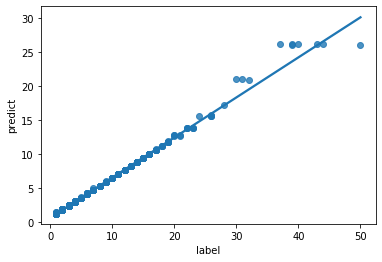

In [134]:
sns.regplot(x = 'label', y = 'predict', data = final_result)